# Изучение закономерностей, определяющих успешность игр

**Цель –** выявление закономерности определяющие успешность игр.

**Задачи:**
 - Обзор даннных
 - Предобработка данных
 - Расчет характеристик
 - Исследовательский анализ данных (поиск закономерностей)
 - Статистический анализ данных
 
**Данные:** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.  

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Примечания:** 
- Данные за 2016 год могут быть неполными.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##  Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.options.display.float_format = '{:.3f}'.format

In [2]:
# Импорт данных
try:
    games_df = pd.read_csv('/datasets/games.csv') 

except:
    games_df = pd.read_csv(r'games (2).csv') 


In [3]:
# Функция обзора данных
def first_look(df):
    print('----------Первые 5 строк----------')
    display(df.head())
    print('\n')
    print('----------Тип данных----------')
    display(df.info())
    print('\n')
    print('----------Пропуски в данных----------')
    df_isna = df.isna().sum()
    fig = sns.heatmap(games_df.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");
    plt.show(fig)
    if df_isna.sum().sum() > 0:
        display(df_isna.loc[df_isna > 0])
    else: print('Пропусков нет')
    print('\n')
    print('----------Дубликаты----------')
    if df.duplicated().sum() > 0:
        print('Дубликатов:', df.duplicated().sum())
    else:
        print('Дубликатов нет')
    print('\n')

----------Первые 5 строк----------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN




----------Тип данных----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None



----------Пропуски в данных----------


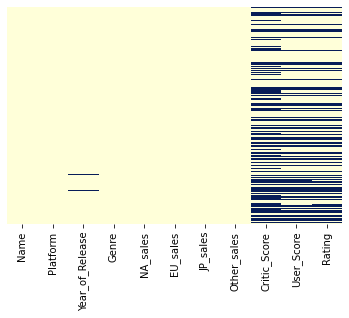

Name                  2
Year_of_Release     269
Genre                 2
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64



----------Дубликаты----------
Дубликатов нет




In [4]:
first_look(games_df)

### Выводы

- Обнаружены пропуски в следующих столбцах:
    - Name                  
    - Year_of_Release     
    - Genre                 
    - Critic_Score       
    - User_Score         
    - Rating             

## Предобработка данных 

Этапы:
- Замена названия столбцов (приведение к нижнему регистру).
- Преобразование данных в нужные типы.
- Подсчёт суммарных продаж во всех регионах.

### Переименование столбцов

In [5]:
# Переименование столбцов
games_df = games_df.rename(str.lower, axis='columns')
list(games_df.columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Рассмотрение tbd в user_score

Аббревиатура tbd расшифровывается как to be determined, что в переводе на русский означет "будет определен". На мой взгляд такая аббревиатура может быть связана с недостаточным количеством оценок, которое может давать нерепрезентативный рейтинг.

In [6]:
# Количество строк с tbd
len(games_df[games_df['user_score'] == 'tbd'])

2424

Значений tbd достаточно много.

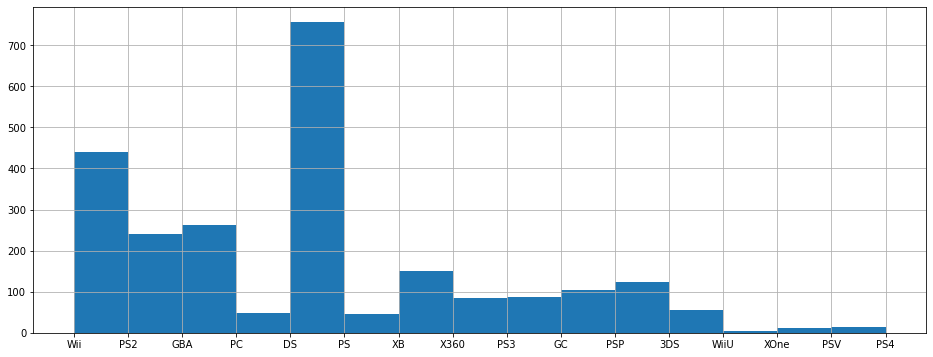

In [7]:
# График распределения tbd по платформам
plt.figure(figsize=(16,6))
games_df[games_df['user_score'] == 'tbd']['platform'].hist(bins=15);

По количеству tbd выделяются платформы Wii и DS. Это платформы Nintendo достаточно старой разработки. Возможно на них не было предусмотрено удобной оценки пользователями, а также выход многих игр мог быть анонсироан в год прекращения работы платформы. Из-за этого могло не набраться достаточное количество покупателей игры для репрезентативной оценки.

Идей для замены `tbd` не нашлось, поэтому заменю его на nan.

In [8]:
# Замена tbd на nan 
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

# Преобразование user_score из object в float 
games_df['user_score'] = games_df['user_score'].astype('float')

### Обработка пропусков 

#### Пропуски в name, year_of_release, genre

Пропусков в столбцах `name`, `year_of_release`, `genre` немного - строки с ними можно удалить.

In [9]:
# Удаление пропусков в столбцах 'name', 'year_of_release', 'genre'
games_df = games_df.dropna(subset=['name', 'year_of_release', 'genre'])

#### Пропуски в rating

Буду считать, что рейтинг с пропущенными значениями не устанавливался. Поэтому заменю nan на обозначение NR (no rating).

In [10]:
games_df['rating'] = games_df['rating'].fillna('NR')

### Преобразование типов данных

In [11]:
# Перевод year_of_release из float в int
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

- `user_score`  - изначальный формат object, однако, на деле в столбце дробное число.
- `year_of_release` - изначальный формат float, а на деле целое число представленное только годом без чисел и месяцев, поэтому не datetime.
- `critical_score` - изначальный формат float, но на деле целое число, но в столбце есть nan поэтому остается float.

### Поиск дубликатов

#### Поиск явных дубликатов

In [12]:
# Поиск явных дубликатов
games_df.duplicated().sum()

0

Явные дубликаты не обнаружены.

#### Поиск неявных дубликатов 

In [13]:
# Поиск неявных дубликатов в платформах
games_df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Существование платформы DC под вопросом. Скорее всего опечатка и должно быть DS. Осуществлю замену.

In [14]:
# Замена
games_df['platform'] = games_df['platform'].replace('DC', 'DS')

In [15]:
# Поиск неявных дубликатов в жанрах
games_df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [16]:
# Поиск неявных дубликатов в платформах
games_df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'NR', 'RP', 'T'], dtype=object)

В остальных возможных столбцах дубликатов не обнаружено.

### Расчет продаж

In [17]:
# Суммирование продаж
games_df['sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Выводы 

**Выводы**

- Переименованы столбцы;
- Отдельно рассмотрено значение 'tbd' в user_score и заменено на nan;
- Пропуски в rating заменены на NR (no rating)
- Преобразованы типы данных;
- Проведена проверка на дубликаты;
- Рассчитаны глобальные продажи.

In [18]:
# check
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales            16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

Этапы:
- Анализ количества выпуска игр по времени.
- Анализ платформ.
- Выделение актуального периода для анализа.
- Анализ отзывов пользователей и критиков.
- Поиск связи между продажами и отзывами по платформам.
- Анализ продаж игр по жанрам.

### Анализ количества выпускаемых игр по времени

In [19]:
# Функция для вывода вспомагательной информации и построения гистограммы, а также диаграммы размаха
def hist_maker(column, bins):
    print(column.describe(percentiles = [.01,.25,.75,.99]))
    plt.figure(figsize=(10,6))
    plt.hist(column, bins=bins, color='grey', edgecolor='grey', alpha=0.8)
    plt.axvline(column.describe()['mean'], color='r', linestyle='dashed', linewidth=3, label='Mean value: {:.2f}'.format(column.describe()['mean']))
    plt.axvline(column.describe()['50%'], color='b', linestyle='dotted', linewidth=3, label='Median value: {:.0f}'.format(column.describe()['50%']))
    plt.xlabel(column.name)
    plt.ylabel('count')
    plt.legend()
    plt.title('Histogramm {}'.format(column.name))
    plt.figure(figsize=(16,2))
    sns.boxplot(x=column)
    plt.title('Boxplot {}'.format(column.name))

count   16444.000
mean     2006.486
std         5.876
min      1980.000
1%       1987.000
25%      2003.000
50%      2007.000
75%      2010.000
99%      2016.000
max      2016.000
Name: year_of_release, dtype: float64


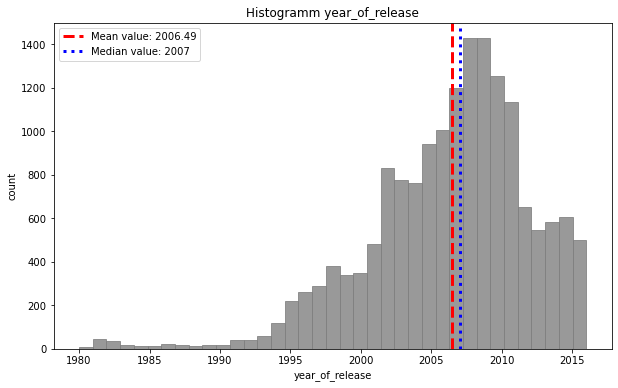

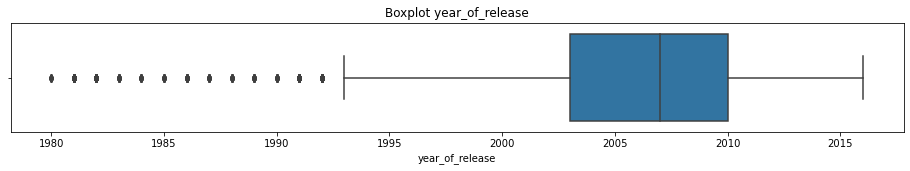

In [20]:
hist_maker(games_df['year_of_release'], 37)

In [21]:
# Уберу выдающиеся значения - игры с годом выпуска до 1994 года.
games_df = games_df[games_df['year_of_release'] > 1993]

**Выводы**

- Значительный рост выпуска игр начался с 1993 года и продолжился до 2008 года (год мирового киризиса);
- Далее до 2016 года шел спад выпуска видеоигр.
- На мой взгляд актуальным периодом для прогноза может послужить период с 2012 по 2016 и точно не ранее 2012 года. Этот период характеризует современное развитие игровой индустрии.

###  Продажи по платформам

Посмотрим как менялись продажи по платформам и выберем платформы с наибольшими суммарными продажами.

In [22]:
# Группировка платформ с наибольшими суммарными продажами и сортировка
platform_sales = (games_df.groupby(by=['platform'])['sales']
                  .sum()
                  .sort_values(ascending=False))
platform_sales

platform
PS2    1233.560
X360    961.240
PS3     931.340
Wii     891.180
DS      818.710
PS      727.580
PS4     314.140
GBA     312.880
PSP     289.530
3DS     257.810
PC      252.660
XB      251.570
N64     218.010
GC      196.730
XOne    159.320
GB      152.080
SNES     84.670
WiiU     82.190
PSV      53.810
SAT      33.590
GEN       8.130
WS        1.420
NG        1.230
SCD       0.360
TG16      0.160
NES       0.110
3DO       0.100
PCFX      0.030
Name: sales, dtype: float64

Выделяются и отрываются от остальных 6 платформ:

- PS2
- X360
- PS3
- Wii
- DS
- PS

In [23]:
top_6_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_6_platforms_df = games_df[games_df['platform'].isin(top_6_platforms)]

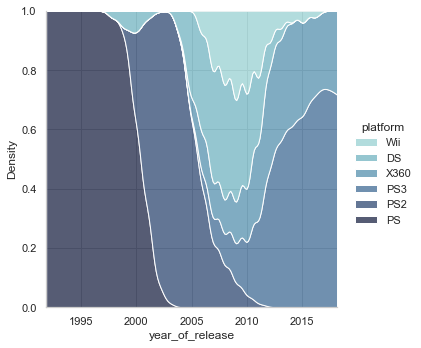

In [24]:
# Условный график плотности распределения
sns.set_theme(style="whitegrid")
sns.displot(
    data=top_6_platforms_df,
    x="year_of_release", hue="platform",
    kind="kde",
    multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.75"
);

**Выводы**

Исходя из графика можно утверждать:

- С 1994 по 2004 годы (целое десятилетие) бесцелером была платформа PS (PS и PS2)
- С 2004 по 2008 годы рынок стали захватывать игры на платформах Nintendo (DS и Wii)
- C 2008 по 2016 годы популярность стала набирать платформа x360, а за ней и PS3 в итоге обогнав её по популярности
- Платформы Wii и DS потеряли свою актуальность к 2016 году.

**Динамика продаж современных платформ**

Рассмотрим продажи современных платформ с 2013 по 2016 гг.

In [25]:
# Группировка по платформам за период 2014-2016 гг.
platform_sales_2014_2016 = (games_df[games_df['year_of_release'] > 2013].groupby(by=['platform'])['sales']
                  .sum()
                  .sort_values(ascending=False))
platform_sales_2014_2016

platform
PS4    288.150
XOne   140.360
3DS     86.680
PS3     68.180
X360    48.220
WiiU    42.980
PC      27.050
PSV     22.400
Wii      5.070
PSP      0.360
Name: sales, dtype: float64

In [26]:
# Список с наименованием популярных платформ
platforms_2014_2016 = (games_df[games_df['platform'].isin(list(platform_sales_2014_2016.index[:6]))]
                      .groupby(['platform', 'year_of_release'])['sales'].sum().reset_index())

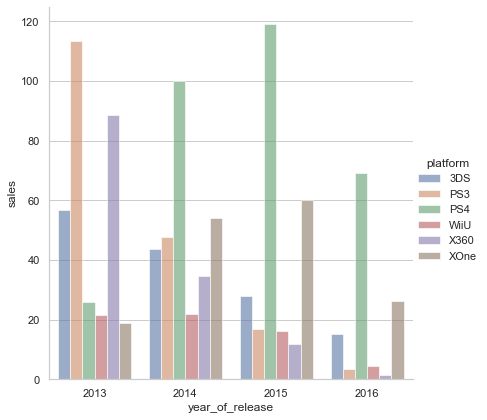

In [27]:
# График с ежегодными продажами платформ за перирод 2013-2016
sns.catplot(
    data=platforms_2014_2016[platforms_2014_2016["year_of_release"] > 2012], kind="bar",
    x="year_of_release", y="sales", hue="platform",
    alpha=.6, height=6
);

- Платформы Nintendo WiiU и 3DS к 2016 году теряют рынок, однако 3DS по продажам ещё остаётся конкурентноспособной. 

- Рост продаж до 2015 года сохраняют XOne и PS4.
    
- Старые платформы Xbox и PS3 начинают уступать своим приенкам в 2014 году.

### Характерный срок жизни платформ

Посмотрим за какой характерный срок появляются новые и исчезают старые платформы.

In [28]:
# Группировка по платформам с расчетом разницы между первым и последним выходом игр на платформе
period = games_df.groupby('platform').agg({'year_of_release' : lambda x: x.max() - x.min()}).reset_index()
period.columns = ['platform', 'period']
period[:5]

,platform,period
0,3DO,1
1,3DS,5
2,DS,15
3,GB,7
4,GBA,7


count   28.000
mean     6.000
std      5.171
min      0.000
1%       0.000
25%      2.000
50%      5.000
75%      9.250
99%     20.110
max     22.000
Name: period, dtype: float64


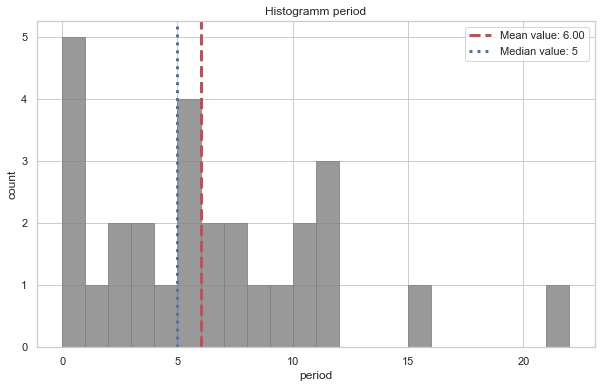

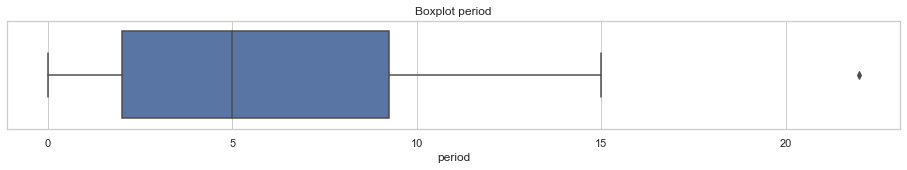

In [29]:
# Графика
hist_maker(period['period'], 22)

In [30]:
# Выдающийся лидер
period.sort_values(by='period', ascending=False)[:1]

,platform,period
10,PC,22


**Выводы**

- В среднем платформы живут около 6 лет;
- Многие платформы не прожили и года;
- Абсолютный лидер с 22-умя годами жизни - это PC.

### Актуальный период

За актуальные периоды примем диапазон 2013-2016 годов с целью прогноза прибыльности на 2017 год. Именно он показывает последние тенденции в изменениях продаж игр.

In [31]:
# Сохранение большого ряда данных
games_df_all = games_df
# Отбор по периоду
games_df = games_df[games_df['year_of_release'] > 2012]

### Прибыльные платформы

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [32]:
# Расчет общих продаж платформ за все годы
platforms_sales = games_df.groupby('platform')['sales'].sum().reset_index()
platforms_sales.sort_values(by='sales', ascending=False)[:10]

,platform,sales
4,PS4,314.140
3,PS3,181.430
10,XOne,159.320
0,3DS,143.250
9,X360,136.800
8,WiiU,64.630
2,PC,39.430
6,PSV,32.990
7,Wii,13.660
5,PSP,3.500


In [33]:
# Группировка по году и платформе
platforms_sales_year = games_df.groupby(['platform', 'year_of_release'])['sales'].sum().reset_index()

In [34]:
platforms_sales_year.head()

,platform,year_of_release,sales
0,3DS,2013,56.570
1,3DS,2014,43.760
2,3DS,2015,27.780
3,3DS,2016,15.140
4,DS,2013,1.540


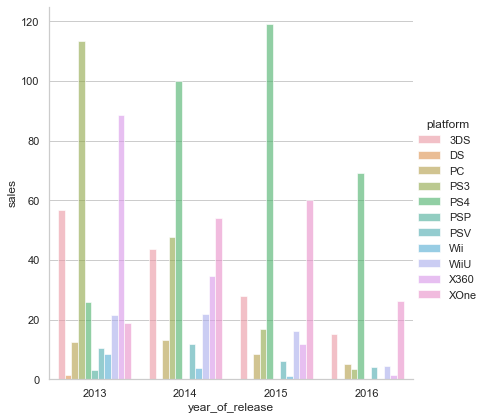

In [35]:
# График с ежегодными продажами платформ
sns.catplot(
    data=platforms_sales_year, kind="bar",
    x="year_of_release", y="sales", hue="platform",
    alpha=.6, height=6
);

**Выводы**

- В 2016 году наблюдается спад продаж всех популярных платформ, как предупреждали выше - этот год может быть неполным;
- До 2016 года положительный тренд по продажам имели PS4 и XOne => они единственные, кто может быть потенциально прибыльными в 2017 году. 

### Диаграммы размаха

Посмотрим на диаграммы размаха по глобальным продажам игр в разбивке по платформам.

count   2233.000
mean       0.488
std        1.235
min        0.010
1%         0.010
25%        0.030
50%        0.110
75%        0.400
99%        5.444
max       21.050
Name: sales, dtype: float64


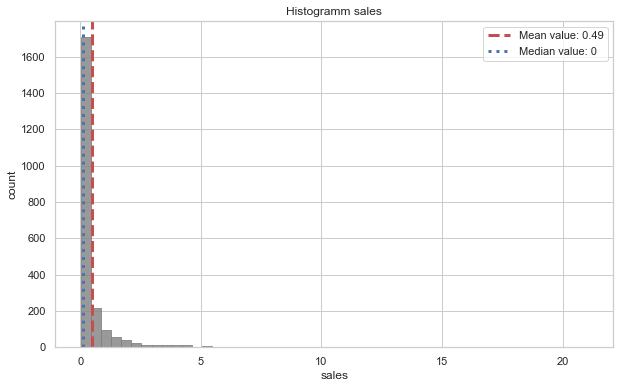

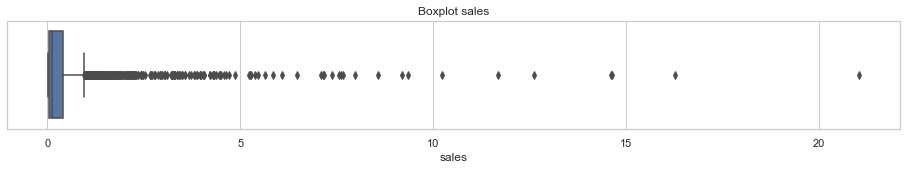

In [36]:
hist_maker(games_df['sales'], 50)

При рассмотрении глобальных продаж обноружились выдающиеся значения.

In [37]:
# Удаление выдающихся значений
games_df = games_df[games_df['sales'] < 5.261]

**Диаграмма размаха за весь период**

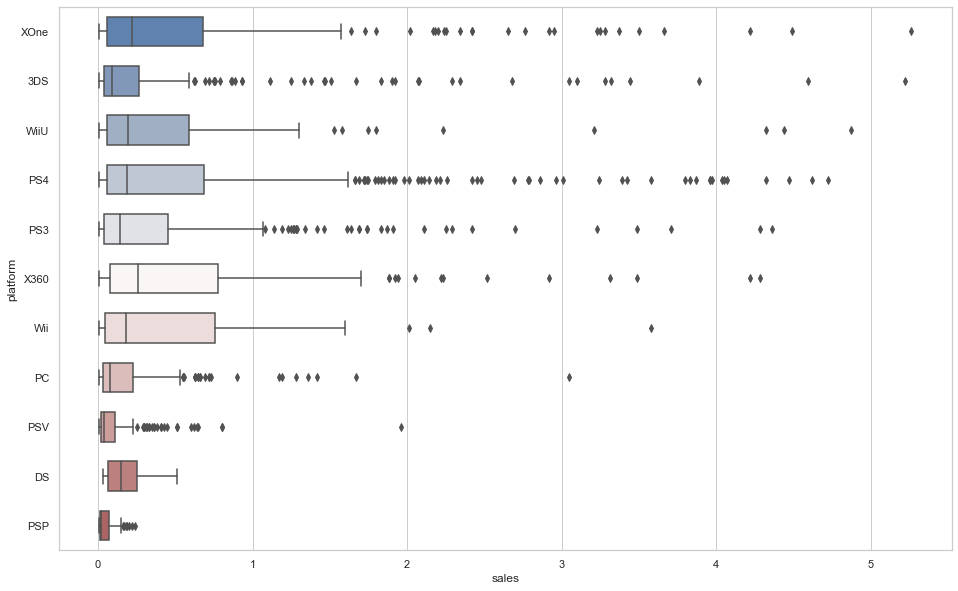

In [38]:
# Диаграмма размаха по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(16, 10))
sns.boxplot(x="sales", y="platform", data=games_df,
            width=.6, palette="vlag");

In [39]:
# Группировка платформ по году выхода первой игры
platform_min_yor = games_df_all.groupby(by=['platform'])['year_of_release'].min()
platform_list_2012 =  list(platform_min_yor[platform_min_yor > 2012].index)
platform_list_2012

['PS4', 'XOne']

**Диаграмма размаха за актуальный период**

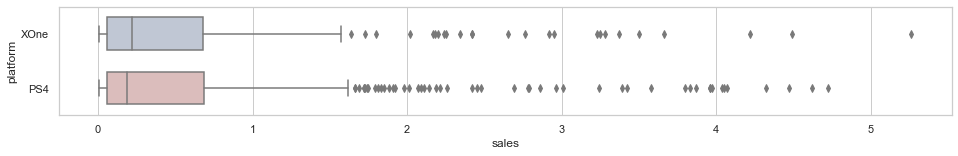

In [40]:
# Диаграмма размаха по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(16, 2))
sns.boxplot(x="sales", y="platform", data=games_df[games_df['platform'].isin(platform_list_2012)],
            width=.6, palette="vlag");

**Выводы**
- Популярные игры характерны для платформ PS3, PS4, XOne, X360, WiiU, Wii.
- Распределение продаж между платформами PS4 и XOne очень похожи, медианное значение чуть больше у XOne, но у PS4 больше выделяющихся значений (значений > 75%-ного перцентиля).

### Продажи и отзывы на популярной платформе

Посмотрим как влияют на продажи внутри самой популярной платформы начиная с 2012 года (PS4) отзывы пользователей и критиков. 

0.01

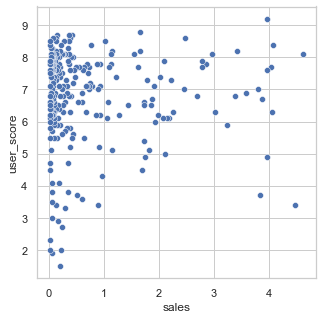

In [41]:
# Диаграмма рассеяния для user_score
plt.figure(figsize=(5, 5))
sns.scatterplot(data=games_df[games_df['platform'] == 'PS4'], x="sales", y="user_score");
round(games_df[games_df['platform'] == 'PS4']['sales'].corr(games_df[games_df['platform'] == 'PS4']['user_score']), 2)

0.4

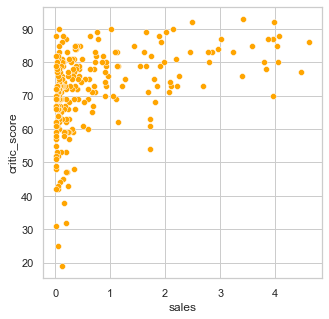

In [42]:
# Диаграмма рассеяния для user_score
plt.figure(figsize=(5, 5))
sns.scatterplot(data=games_df[games_df['platform'] == 'PS4'], x="sales", y="critic_score", color='orange');
round(games_df[games_df['platform'] == 'PS4']['sales'].corr(games_df[games_df['platform'] == 'PS4']['critic_score']), 2)

**Выводы**

- Связь между продажами и оценкой пользователей отсутствует;
- Наблюдается слабая связь между продажами и оценкой критиков;
- При значении оценки критиков менее 50, продаж более миллиона копий не наблюдается.

### Продажи и отзывы на остальных платформах

Рассмотрим связи между продажами и отзывами критиков на остальных платформах.

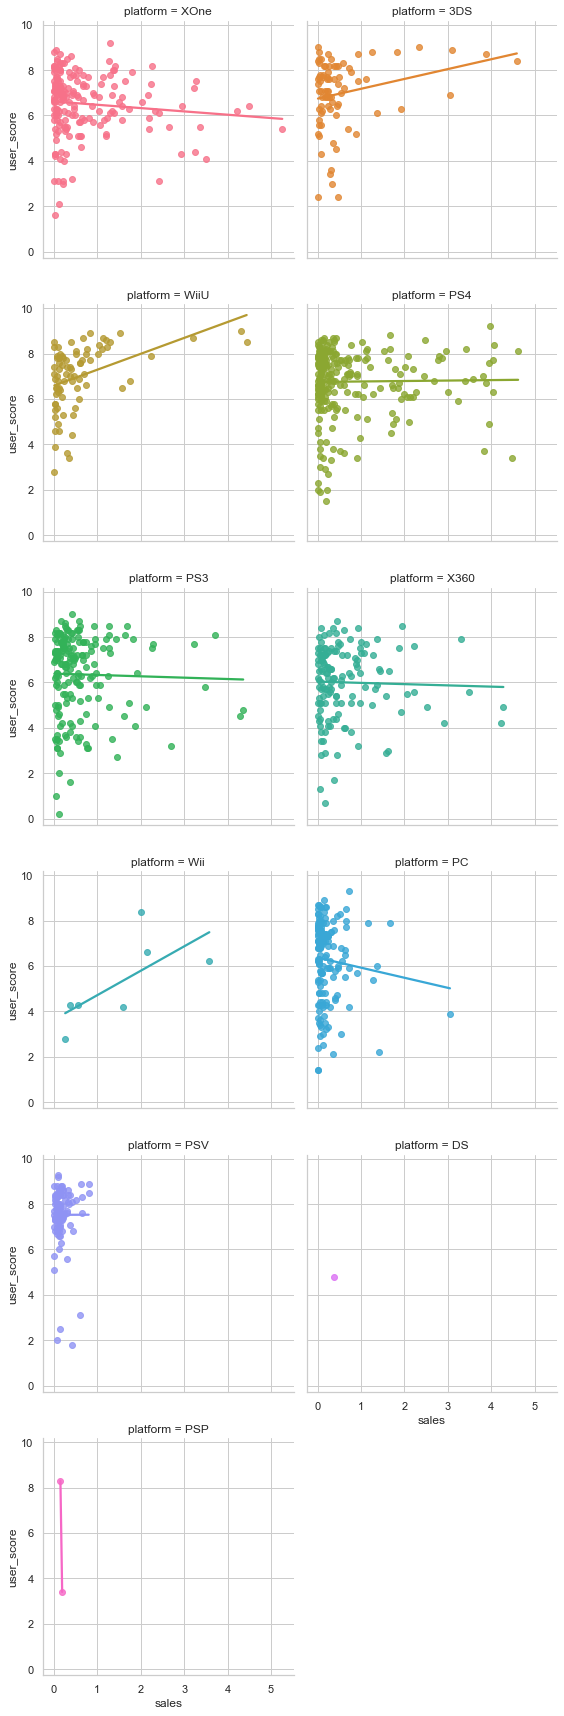

In [43]:
# Диаграммы рассеяния между продажами и оценкой пользователя
sns.lmplot(y="user_score", x="sales", col="platform", hue="platform", data=games_df,
           col_wrap=2, ci=None, height=4);

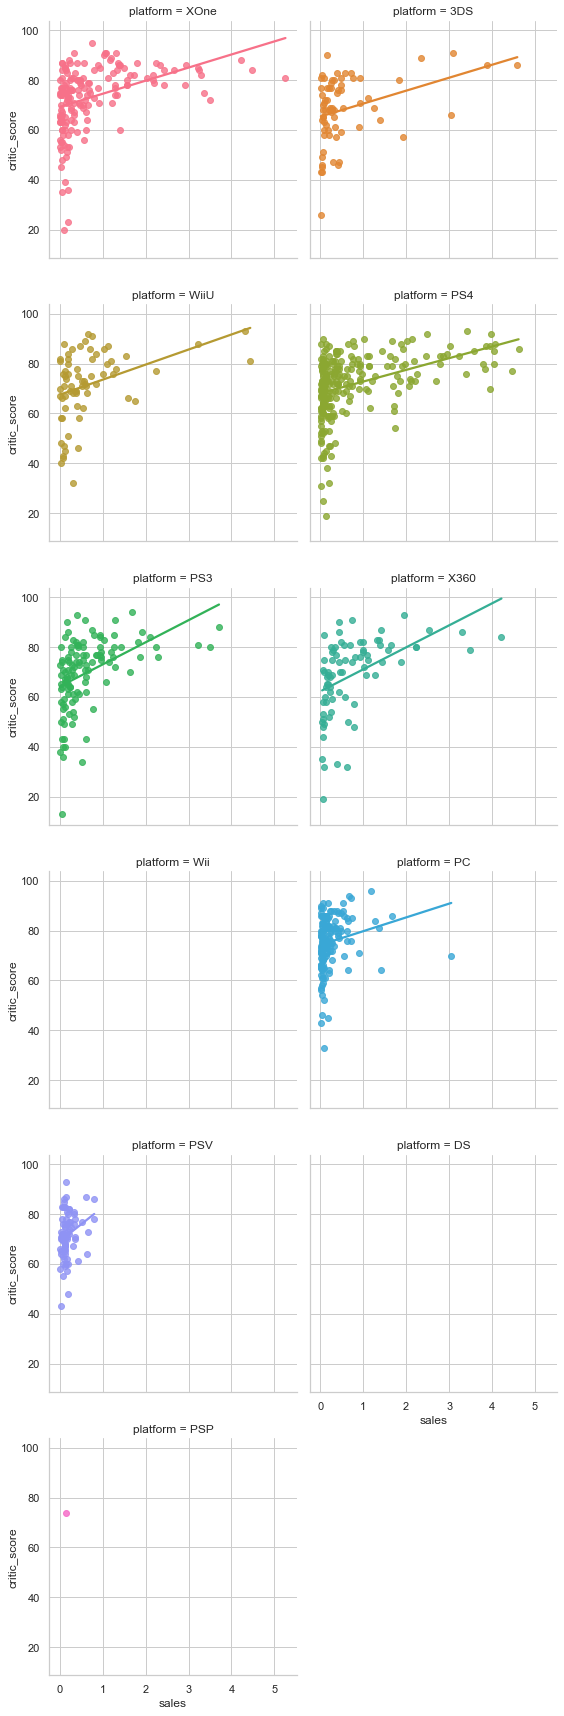

In [44]:
# Диаграммы рассеяния между продажами и оценкой критика
sns.lmplot(y="critic_score", x="sales", col="platform", hue="platform", data=games_df,
           col_wrap=2, ci=None, height=4)

In [45]:
# Расчет коэффициента корреляции
games_df_corr = games_df[['platform', 'sales', 'user_score', 'critic_score']].groupby('platform')
(games_df_corr[['sales', 'user_score', 'critic_score']]
 .corr()
 .drop(index='sales', level=1)
 .drop(columns=['user_score', 'critic_score'])
 .style.background_gradient(axis=None, vmin=0, vmax=1, cmap="YlGnBu")
 .format({'sales': '{:.2}', 'user_score': '{:.2}', 'critic_score': '{:.2}'}))

**Выводы**

- Оценка корреляции на платформах PSP, DS, Wii нерепрезентативна в связи с малым количеством игр, а также со значительным количеством заменных пропусков;
- В популярных платформах (PC, PS3, PS4, WiiU, X360, XOne) наблюдается слабая линейная зависимость между продажами и отзывами критиков;
- На платформе WiiU так же наблюдается слабая линейная зависимость между продажами отзывами пользователей;
- При отрицательных отзывах критиков (< 50) игры в большинстве случаев не переваливают рубеж по продажам более 1 млн копий.

### Распределение игр по жанрам

Рассмотрим распределение игр по жанрам.

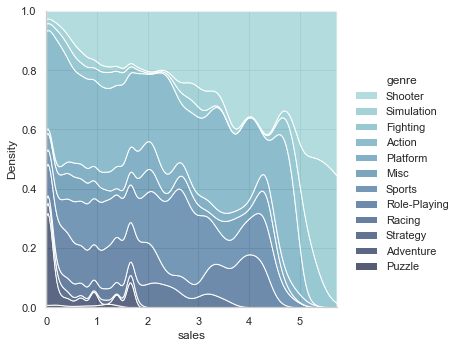

In [46]:
# Построение диаграммы условной плотности распределения
sns.set_theme(style="whitegrid")
sns.displot(
    data=games_df,
    x="sales", hue="genre",
    kind="kde",
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
);

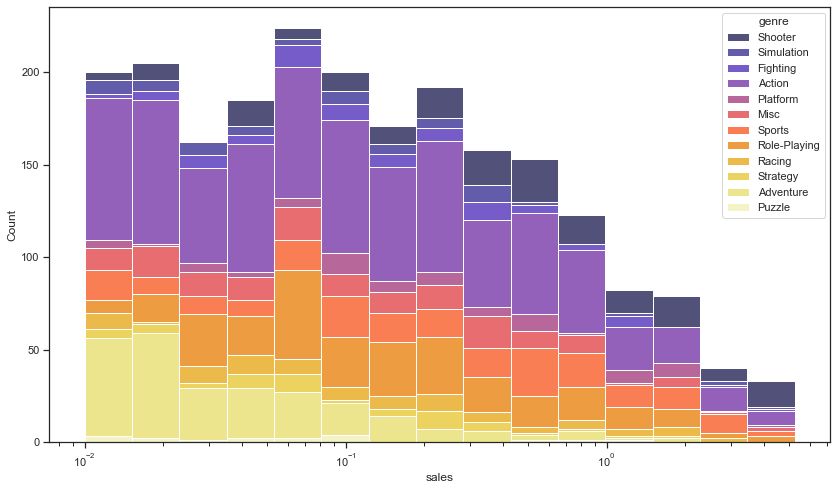

In [47]:
# Гистограмма распределения продаж по жанрам с логарифмической шкалой
plt.figure(figsize=(14, 8))
sns.set_theme(style="ticks")
sns.histplot(
    games_df,
    x="sales", hue="genre",
    multiple="stack",
    palette="CMRmap",
    bins = 15,
    log_scale=True
);

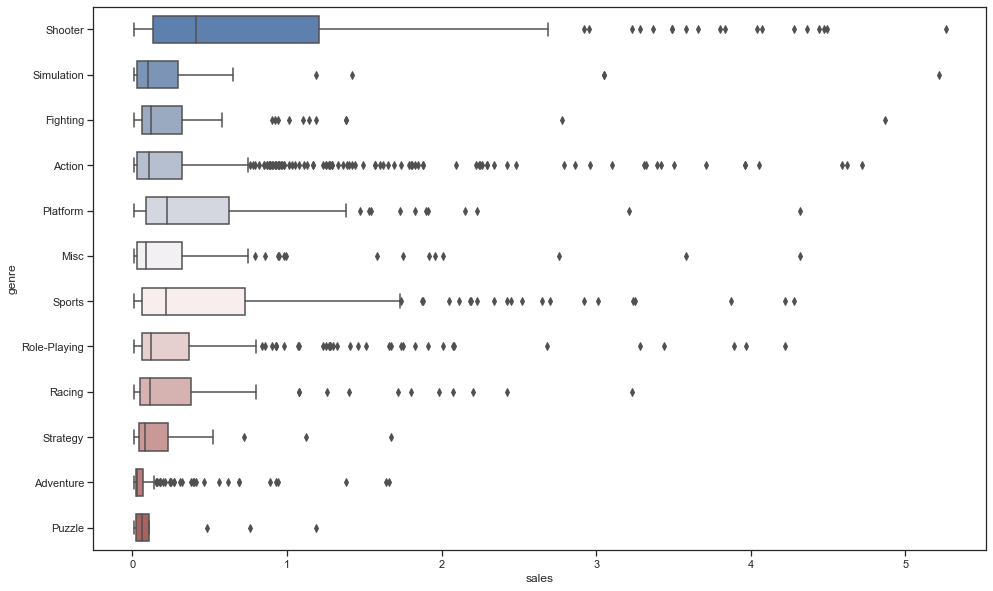

In [48]:
# Построение боксплота
plt.figure(figsize=(16, 10))
sns.boxplot(x="sales", y="genre", data=games_df,
            width=.6, palette="vlag");

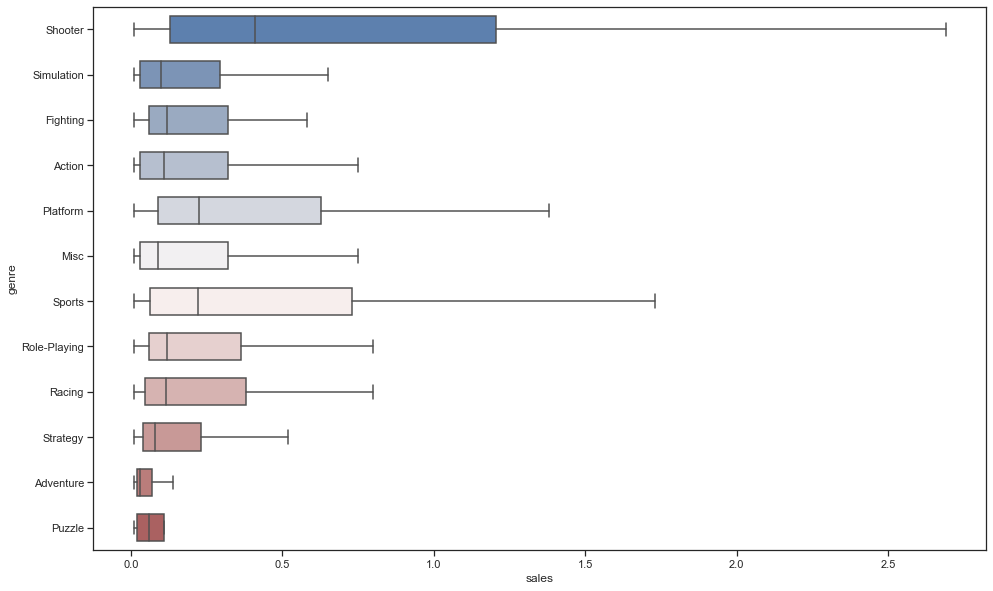

In [49]:
# Построение боксплота без выбросов
plt.figure(figsize=(16, 10))
sns.boxplot(x="sales", y="genre", data=games_df,
            showfliers=False,
            width=.6, palette="vlag");

<div style="border:solid blue 2px
Современных платформ всего две - PS4 и XOne. В первую очередь нужно анализировать именно их.


**Выводы**

- Основная масса игр продается в количестве менее 1 млн. копий;
- После рубежа продаж в 1 млн. в основном продаются шутеры;
- При приближении к продажам копий в размере 6 млн. шутеры преобладают на рынке (однако количество игр не велико);
- Значимая доля продаж наблюдается у жанров Sports и Action c продажами до 5 млн. копий.
</div> 

**Выводы**
- По медианному значенияю продаж лидирует жанр Shooter. Медианное значение чуть больше остальных у жанра Sports;
- Жанр Schooter достаточно стабилен при высоких значениях продаж, а также имеет стабильный ряд успешно продающихся игр (большой отрезок между 50% и 75%, выбросов не очень много). Жанр Sports также подходит под этот вывод, только продаж у него меньше. 
- Наибольшей стабильностью отличается жанр Puzzle ("усы" симметричные, а выбросов практически нет), однако успешным его не назовешь, в связи с небольшими продажами.
- Достаточно нестабильные продажи присущи жанру Action, в котором очень много выдающихся значений.

## Портрет пользователя каждого региона

Для пользователя каждого региона (NA, EU, JP) определим:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)

Также рассмотрим возрастной рейтинг игр.

### Самые популярные платформы (топ-5)

In [50]:
# Функция для вывода топ-5 и построения графика
def point_plot_maker(df, column_name):
    group = (df[[column_name, 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']]
            .groupby(column_name)
            .sum()
            .reset_index()
            .sort_values('sales', ascending=False)
            [:5])
    print('Топ-5')
    print(group)
    g = sns.PairGrid(group.sort_values("sales", ascending=False),
                     x_vars=games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']], y_vars=[column_name],
                     height=5, aspect=.25)

    # Отрисовка точечного графика
    g.map(sns.stripplot, size=10, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")
    g.set(xlabel="Sales", ylabel="")
    titles = ["NA", "EU", "JP",
             "Other", "Global"]

    for ax, title in zip(g.axes.flat, titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    
    sns.despine(left=True, bottom=True)

In [51]:
# Круговые диаграммы
def pie(column):
    # Задаем список регионов
    countries = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']
    # Начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
      # выберем 5 самых продающих платформ
        df_i = (games_df.groupby(column)[countries[i]].sum()
                 .reset_index()
                 .sort_values(countries[i], ascending = False, ignore_index = True)
                 .head(5))
        # Занесем все остальыне продажи в Other
        if column != 'rating':
            df_i = df_i.append({column: 'Oth', countries[i]: games_df[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
            axs[i].pie(df_i[countries[i]], labels = df_i[column])
        else:
            axs[i].pie(df_i[countries[i]], labels = df_i[column])

        # Зададим название региона.
        axs[i].set_title(df_i.columns[1].split('_')[0].upper())
    plt.show()

Топ-5
   platform  na_sales  eu_sales  jp_sales  other_sales   sales
4       PS4    83.500    97.910    14.080       35.300 230.790
10     XOne    85.720    47.290     0.330       13.120 146.460
3       PS3    47.160    46.300    21.640       18.330 133.430
0       3DS    22.320    20.460    55.670        3.830 102.280
9      X360    59.570    32.170     0.390        8.980 101.110


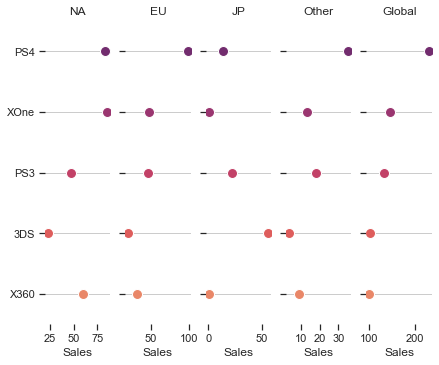

In [52]:
point_plot_maker(games_df, 'platform')

In [53]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

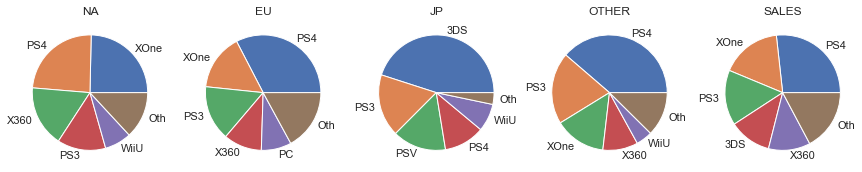

In [54]:
pie('platform')

**Вывод**

- В мире популярны две платформы - PS4 и XOne;
- В Японии с большим отрывом по популярности лидирует платформа 3DS;
- В Северной Америке немного преобладают продажи XOne, а в Европе и в других регионах лидерство занимает PS4.

### Самые популярные жанры (топ-5)

Топ-5
           genre  na_sales  eu_sales  jp_sales  other_sales   sales
0         Action   100.190    93.220    38.790       28.400 260.600
8        Shooter    78.150    62.160     5.110       19.270 164.690
10        Sports    61.910    40.080     5.150       14.790 121.930
7   Role-Playing    31.260    24.570    41.090        8.380 105.300
3           Misc    19.760    15.020     9.180        4.410  48.370


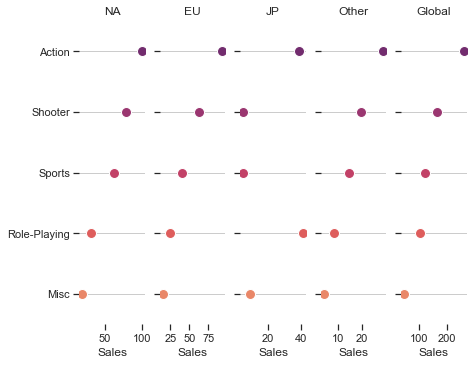

In [55]:
point_plot_maker(games_df, 'genre')

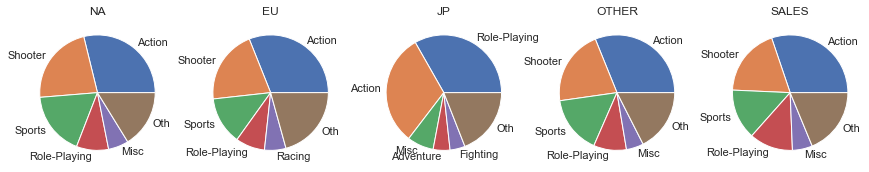

In [56]:
pie('genre')

**Выводы**

- Жанр Action популярен везде;
- Schooter конкурирует с Action за звание самого популярного жанра (за исключением Японии);
- Жанр Sports также достаточно популярен, особенно в Северной Америке;
- В Японии жанр Action немного отстает по популярности от Role-playing, что сочетается с популярностью платформы 3DS;
- Оставшиеся жанры в Японии непопулярны.

### Рейтинг ESRB 

Топ-5
  rating  na_sales  eu_sales  jp_sales  other_sales   sales
2      M   123.180   107.470    11.610       33.720 275.980
3     NR    52.200    51.930    72.300       14.990 191.420
0      E    72.540    60.770    13.600       17.440 164.350
4      T    45.450    37.380    20.240       12.520 115.590
1   E10+    54.240    42.690     5.890       12.570 115.390


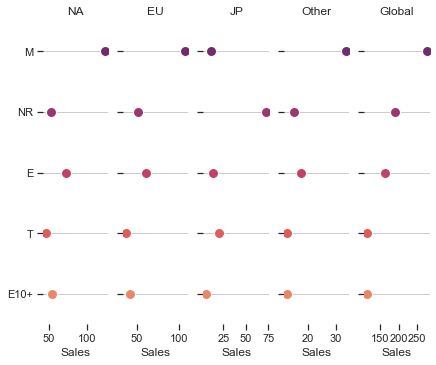

In [57]:
point_plot_maker(games_df, 'rating')

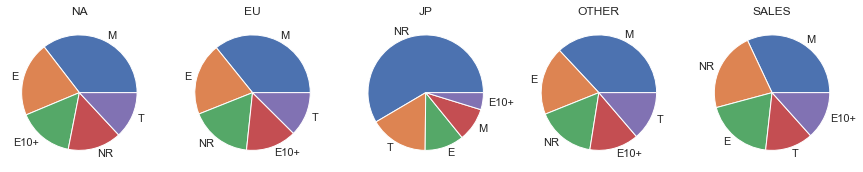

In [58]:
pie('rating')

**Выводы**

- Рейтинг ESRB не влияет на продажи по регионам;
- В мире популярность имеет рейтинг M (для взрослых);
- В Японии же единственный популярный рейтинг NR (no rating) - это связано с тем, что в Японии есть своя рейтинговгая система CERO.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

H0 - среднее значение пользовательского рейтинга платформы Xbox One РАВНО среднему значению пользовательского рейтинга PC.

H1 - среднее значение пользовательского рейтинга платформы Xbox One НЕ равно среднему значению пользовательского рейтинга PC.

Для сопоставления средних генеральных совокупностей по взятым из них независимым выборкам используется метод `scipy.stats.ttest_ind()`.

In [59]:
# Категоризация
user_score_xbox_one = games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
user_score_PC = games_df[games_df['platform'] == 'PC']['user_score'].dropna()

In [60]:
# Расчет дисперсии
print('Дисперсия для XOne', round(np.var(user_score_xbox_one), 2))
print('Дисперсия для PC', round(np.var(user_score_PC), 2))

Дисперсия для XOne 1.9
Дисперсия для PC 3.02


Дисперсии отличаются сильно, поэтому equal_var поставлю равным False.

In [61]:
# t-test_ind
alpha = .05
results = st.ttest_ind(user_score_xbox_one, user_score_PC, equal_var=False)
print('p_value:', round(results.pvalue, 2))
if results.pvalue < alpha:
    print('Отвержение нулевой гипотезы')
else:
    print('Принятие нулевой гипотезы')

p_value: 0.16
Принятие нулевой гипотезы


In [62]:
print('user_score_XOne', round(user_score_xbox_one.mean(), 2))
print('user_score_PC', round(user_score_PC.mean(), 2))

user_score_XOne 6.51
user_score_PC 6.27


**Вывод:** cреднее значение пользовательского рейтинга платформа Xbox One РАВНО среднему значению пользовательского рейтинга PC.

### Средние пользовательские рейтинги жанров Action и Sports 

H0 - среднее значение пользовательского рейтинга жанра Action РАВНО среднему значению пользовательского рейтинга Sports.

H1 - среднее значение пользовательского рейтинга жанра Action НЕ равно среднему значению пользовательского рейтинга Sports.

In [63]:
# Категоризация
user_score_action = games_df[games_df['genre'] == 'Action']['user_score'].dropna()
user_score_sports = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

In [64]:
# Расчет дисперсии
print('Дисперсия для Action', round(np.var(user_score_action), 2))
print('Дисперсия для Sports', round(np.var(user_score_sports), 2))

Дисперсия для Action 1.76
Дисперсия для Sports 3.23


Дисперсии отличаются сильно, поэтому equal_var поставлю равным False.

In [65]:
# t-test_ind
alpha = .05
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
print('p_value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвержение нулевой гипотезы')
else:
    print('Принятие нулевой гипотезы')

p_value: 2.9089807420749217e-19
Отвержение нулевой гипотезы


In [66]:
print('user_score_action', round(user_score_xbox_one.mean(), 2))
print('user_score_sports', round(user_score_PC.mean(), 2))

user_score_action 6.51
user_score_sports 6.27


**Вывод:** cреднее значение пользовательского рейтинга жанра Action НЕ равно среднему значению пользовательского рейтинга Sports.

## Выводы

**Обзор и предоработка данных**
- Проведен обзор данных;
- Обнаружены и заменены пропуски;
- Исключены выдающиеся значения;
- Выделен актуальный период;
- Расчитаны глобальные продажи.

**Исследовательский анализ данных**
- Значительный рост выпуска игр начался с 1993 года и продолжился до 2008 года (год мирового киризиса), далее шёл спад выпуска игр;
- С 1994 по 2004 годы (целое десятилетие) бесцелером была платформа PS (PS и PS2);
- С 2004 по 2008 годы рынок стали захватывать игры на платформах Nintendo (DS и Wii);
- C 2008 по 2016 годы популярность стала набирать платформа x360, а за ней и PS3 в итоге обогнав её по популярности;
- Платформы Nintendo к 2016 году потеряли свою актульность окончательно;
- В среднем платформы живут около 6 лет;
- До 2016 года положительный тренд по продажам имели: PS4 и XOne - они могут быть потенциально пибыльными;
- Распределение продаж платформ PS4 и XOne очень похожи.</span>;
- Связь между продажами и оценкой пользователей отсутствует, при этом наблюдается слабая связь между продажами и оценкой критиков;
- При значении оценки критиков менее 50, продаж более миллиона копий не наблюдается.
- Лидер по продажам - жанр.

**Портрет пользователя каждого региона**
- В целом по миру поулярны две платформы - PS4 и XOne, но в Японии 3DS;
- В целом по миру поулярны три жанра - Schooter, Sports и Action, но в Японии преобладает жанр Role-playing;
- Рейтинг ESRB - в целом не влияет на продажи - самый популярный рейтинг - M (для взрослых), но исключением остается Япония со своей рейтинговой системой CERO.

**Проверка гипотез**
- Среднее значение пользовательского рейтинга платформы XOne РАВНО среднему значению пользовательского рейтинга PC;
- Cреднее значение пользовательского рейтинга жанра Action НЕ равно среднему значению пользовательского рейтинга Sports.


**Главные выводы**
Были выявлены следующие закономрности успешности игр:

- Повышенный рейтинг критиков (>50-60) имеет некоторое влияние на успешность (или наоборот);
- По миру самые популярные платформы - XOne и PS4, но в Японии 3DS, а XOne в Японии вообще отсутствует;
- Игры жанра Schooter и Action популярны во всех регионах, но в Японии лидирует по продажам жанр Role-playing;
- Игры для взрослых имеют бОльший успех.